In [15]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [16]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [17]:
NUM_CLASSES = 31

# 学習データ読み込み

In [18]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [19]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [22]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 31)                341       
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [24]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [25]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/8 [==>...........................] - ETA: 5s - loss: 3.4793 - accuracy: 0.0156
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 1s 36ms/step - loss: 3.4922 - accuracy: 0.0279 - val_loss: 3.4541 - val_accuracy: 0.0577
Epoch 2/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.4359 - accuracy: 0.0469
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 12ms/step - loss: 3.4490 - accuracy: 0.0397 - val_loss: 3.4312 - val_accuracy: 0.0577
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.4517 - accuracy: 0.0391
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5


c:\Users\happy\Documents\hand-gesture-recognition-mediapipe\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 15ms/step - loss: 3.4377 - accuracy: 0.0375 - val_loss: 3.4132 - val_accuracy: 0.0737
Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.4156 - accuracy: 0.0547
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 17ms/step - loss: 3.4234 - accuracy: 0.0322 - val_loss: 3.3967 - val_accuracy: 0.0737
Epoch 5/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.4252 - accuracy: 0.0312
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 10ms/step - loss: 3.4108 - accuracy: 0.0450 - val_loss: 3.3817 - val_accuracy: 0.0545
Epoch 6/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.3961 - accuracy: 0.0859
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 11ms/step - loss: 3.3891 - accuracy: 0.0686 - val_loss: 3.3662 -

In [26]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 6ms/step - loss: 1.2605 - accuracy: 0.6795


In [27]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [28]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 128ms/step
[1.9155625e-05 1.3742175e-02 2.4380347e-02 3.9581565e-07 8.2019409e-03
 9.4067610e-12 2.7512174e-08 5.8447076e-03 5.4348336e-04 1.9618817e-06
 1.6581338e-02 1.1901814e-07 2.2054726e-08 4.0473944e-07 1.4516326e-02
 8.7262833e-08 1.2775509e-01 4.6125450e-04 8.8768729e-08 5.9163731e-01
 4.3235432e-05 6.4552971e-08 2.0028836e-04 1.3682630e-04 2.8135700e-03
 5.1434356e-04 1.8330744e-01 3.9779538e-06 8.7634078e-05 9.2064003e-03
 6.1916534e-09]
19


# 混同行列

10/10 [==============================] - 0s 2ms/step


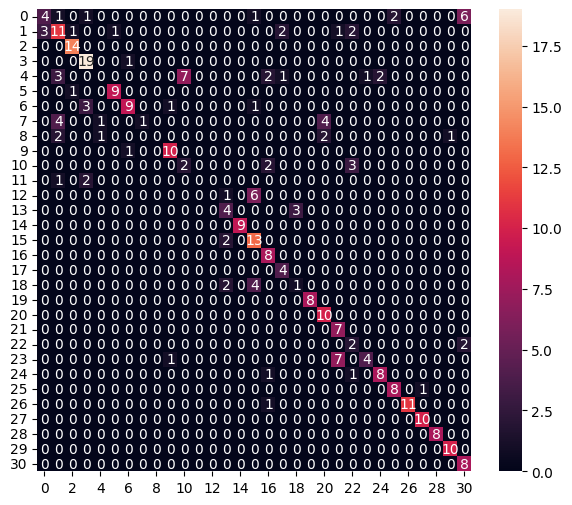

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.27      0.36        15
           1       0.50      0.52      0.51        21
           2       0.88      1.00      0.93        14
           3       0.76      0.95      0.84        20
           4       0.00      0.00      0.00        16
           5       0.90      0.90      0.90        10
           6       0.82      0.64      0.72        14
           7       1.00      0.10      0.18        10
           8       0.00      0.00      0.00         6
           9       0.83      0.91      0.87        11
          10       0.22      0.29      0.25         7
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         7
          13       0.44      0.57      0.50         7
          14       1.00      1.00      1.00         9
          15       0.52      0.87      0.65        15
          16       0.57      1.00      0.73         8
     

c:\Users\happy\Documents\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\happy\Documents\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\happy\Documents\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [30]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

c:\Users\happy\Documents\hand-gesture-recognition-mediapipe\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\happy\AppData\Local\Temp\tmpjcbkps2n\assets


INFO:tensorflow:Assets written to: C:\Users\happy\AppData\Local\Temp\tmpjcbkps2n\assets


7760

# 推論テスト

In [32]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [33]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [34]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [35]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [36]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.91556264e-05 1.37421759e-02 2.43803542e-02 3.95816045e-07
 8.20193812e-03 9.40676356e-12 2.75121828e-08 5.84470341e-03
 5.43483475e-04 1.96188216e-06 1.65813323e-02 1.19018154e-07
 2.20546870e-08 4.04739154e-07 1.45163173e-02 8.72627552e-08
 1.27755046e-01 4.61254560e-04 8.87687506e-08 5.91637433e-01
 4.32354391e-05 6.45531060e-08 2.00288123e-04 1.36826464e-04
 2.81356741e-03 5.14343672e-04 1.83307469e-01 3.97795020e-06
 8.76340855e-05 9.20640212e-03 6.19166629e-09]
19
